<img src="./logo_UTN_Guia_2.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Resolucion Guia 2
### Axel Nathanel Nahum

## Introduccion

En este notebook encontraremos la $resolucion$ de la $guia$ $2$ de trabajos practicos, junto a simulaciones y desarrollo en lapiz y papel.

## Ejercicio #1 

<img src="./Ej1.png" align="middle" width="1000" /> 

## Resolucion

In [2]:
from IPython.display import IFrame
IFrame("./Resolucion_Guia_2_EJ1.pdf", width=900, height=1000)

## Verificacion por Python

In [6]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

TransferFunctionContinuous(
array([1.]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)


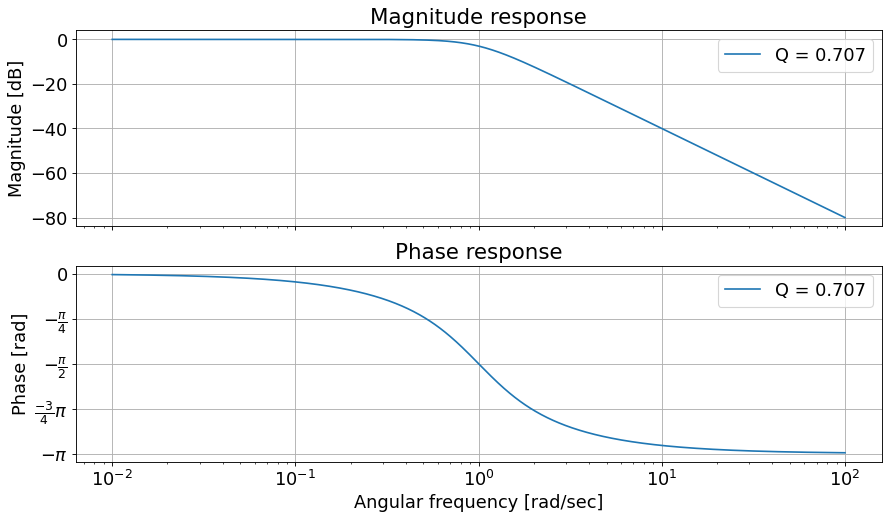

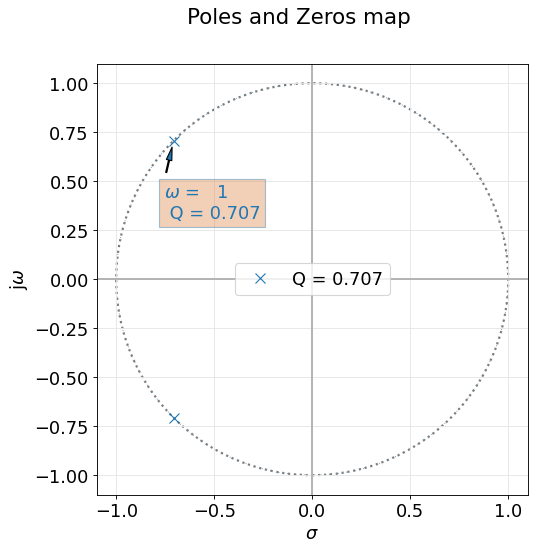

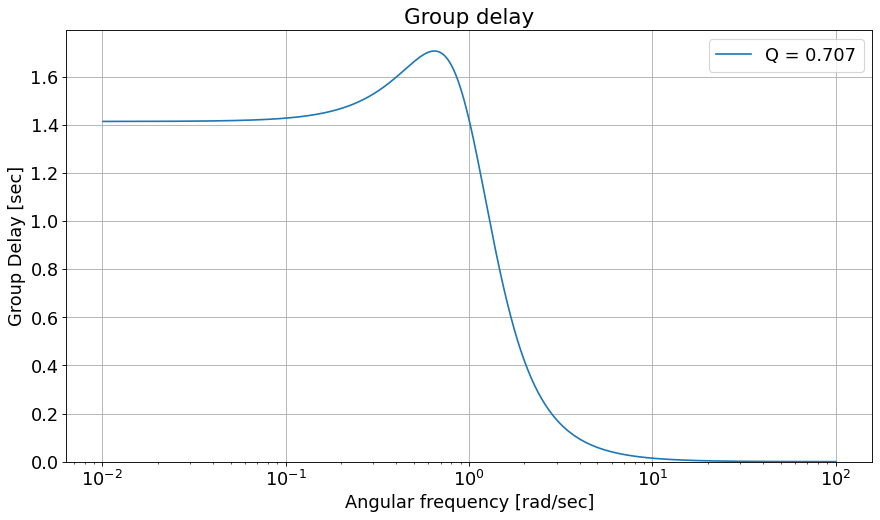

In [10]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

wp = 2 * np.pi * 1000
Ωws = ws/wp

# Orden del filtro
nn = 2

qq = np.sqrt(2)/2

Z,P,K = sig.buttap(2)
Num,Den = sig.zpk2tf(Z,P,K)
Num_mp,Den_mp = sig.lp2lp(Num,Den, 1)

TF = TransferFunction(Num_mp, Den_mp)
print(TF)

#bodePlot(TF, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

#pzmap(TF, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

#GroupDelay(TF, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))

analyze_sys(TF, sys_name='Q = {:3.3f}'.format(qq))

Se ve claramente que se trata de un filtro $Butterworth$ de orden 2, debido al Q que esta manejando y la ubicacion de esos polos.

## Circuito LTspice

<img src="./Circuito_Guia_2_Ej1.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_Frecuencia_Guia_2_Ej1.PNG" align="middle" width="1000" /> 

## Ejercicio #2

<img src="./Ej2.png" align="middle" width="1000" /> 

## Resolucion

In [3]:
from IPython.display import IFrame
IFrame("./Resolucion_Guia_2_EJ2.pdf", width=900, height=1000)

## Verificacion por Python

In [7]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

TransferFunctionContinuous(
array([2.86277516]),
array([1.        , 3.99369674, 7.97480683, 9.84186991, 7.5066718 ,
       2.86277516]),
dt: None
)


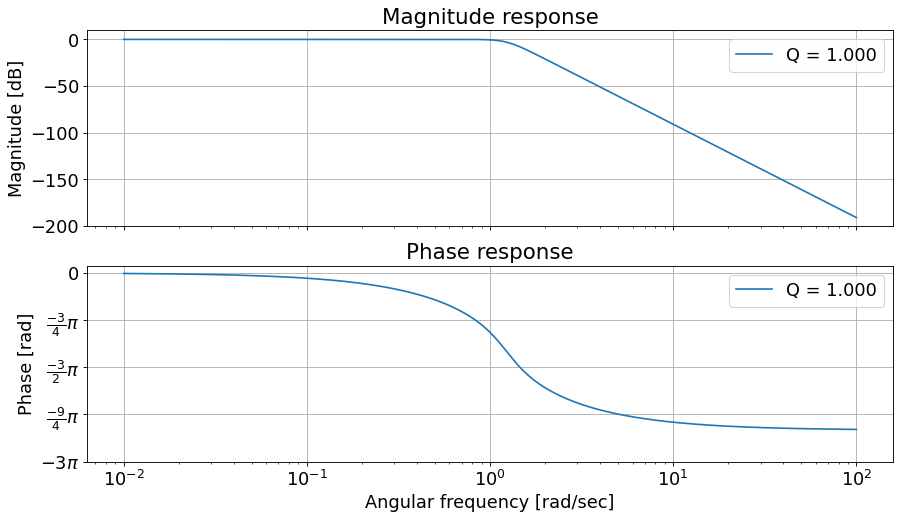

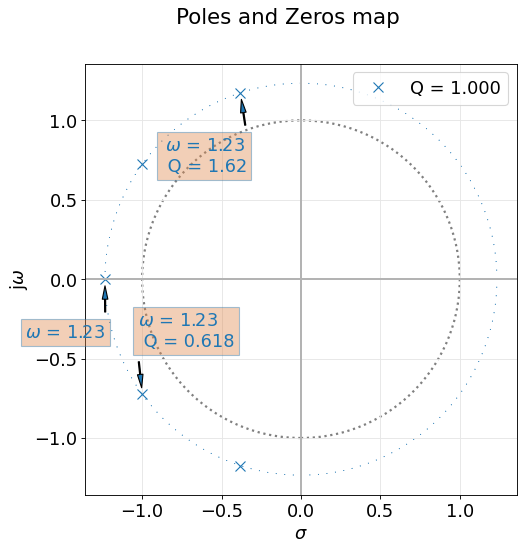

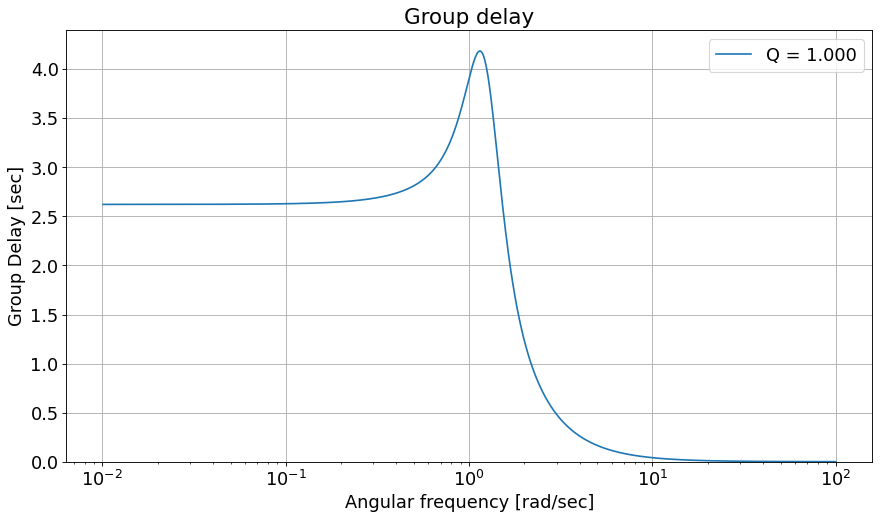

In [6]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

wp = 2 * np.pi * 1000
ws = 2 * np.pi * 2000
Ωws = ws/wp

# Orden del filtro
nn = 5

αmax = 0.5
e = np.sqrt(10**(αmax/10) - 1) # "epsilon"
Ωwb = wp * e**(-1/nn)

for n in range (1 , 9):
 αminn = 10 * np.log10(1 + (e**2 * Ωws**(2*n)))
# print(αminn)

qq = 1

Z,P,K = sig.buttap(nn)
Num,Den = sig.zpk2tf(Z,P,K)
Num_mp,Den_mp = sig.lp2lp(Num,Den, e**(-1/nn))

TF = TransferFunction(Num_mp, Den_mp)
print(TF)

#bodePlot(TF, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

#pzmap(TF, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

#GroupDelay(TF, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))

analyze_sys(TF, sys_name='Q = {:3.3f}'.format(qq))

Lo calculado en el PDF verifica lo visto en los graficos de polos y ceros, es decir el valor de $\omega_0$ y los distintos Q.